# Primer parcial, 13 de julio de 2023
### Renata Salvati Dávila
***

<img src="./Consigna1.png" align="center" /> 

**a)**

<img src="./Hoja1.jpeg" align="center" /> 

Estoy al tanto de que la transferencia quedó con una atenuación ya que el numerador me queda $\frac{1}{4e²}$ y en el denominador el término constante es $\frac{1}{4e²}+\frac{1}{4}$, pero por no llegó por tiempos a revisar. Debería quedar de 0db.

In [6]:
# Inicialización e importación de módulos

# Módulos externos
import numpy as np
import scipy.signal as sig
import matplotlib as mpl
import math

from matplotlib import pyplot as plt
from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti, bodePlot, pzmap, tf2sos_analog, pretty_print_SOS

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

In [29]:
#Datos de enunciado para filtro pasa banda
a_max = 1
n = 2

w0_n = 1
wp1_n = 0.95
wp2_n = 1.05
ws1_n = 0.5
ws2_n = 2

Bw_n = wp2 - wp1
Q = w0/Bw

#conversión de parámetros para un filtro pasa bajos equivalente
Wp1_n = round(Q*(wp1_n**2 - w0_n**2)/wp1_n, 3)
Wp2_n = round(Q*(wp2_n**2 - w0_n**2)/wp2_n, 3)
Ws1_n = round(Q*(ws1_n**2 - w0_n**2)/ws1_n, 3)
Ws2_n = round(Q*(ws2_n**2 - w0_n**2)/ws2_n, 3)

Wp_n = math.fabs(round(Wp1_n))
Ws_n = math.fabs(round(Ws1_n))

e2 = round(10**(a_max/10) - 1, 3)
a_min = round(10*np.log10(1 + e2*np.cosh(n*np.arccosh(Ws_n))**2), 3)

print(f"Parámetros del filtro pasa bajos equivalente: \ne² = {e2}, a_min = {a_min}\n")

z,p,k = sig.cheb1ap(n, a_max)
num_lp_n, den_lp_n = sig.zpk2tf(z,p,k)

sos_lp = tf2sos_analog(num_lp_n, den_lp_n)

print("Transferencia del filtro Prototipo:")
pretty_print_lti(num_lp_n, den_lp_n)
print("\nEn su forma factorizada:")
pretty_print_SOS(sos_lp, mode='omegayq')

Parámetros del filtro pasa bajos equivalente: 
e² = 0.259, a_min = 47.178

Transferencia del filtro Prototipo:


<IPython.core.display.Math object>


En su forma factorizada:


<IPython.core.display.Math object>

**b)**

<img src="./Hoja2.jpeg" align="center" /> 

In [31]:
num_bp_n, den_bp_n = sig.lp2bp(num_lp_n, den_lp_n, w0_n, Bw_n)
sos_bp = tf2sos_analog(num_bp_n, den_bp_n)

print("Transferencia del filtro pasa banda:")
pretty_print_lti(num_bp_n, den_bp_n)
print("En su forma factorizada:")
pretty_print_SOS(sos_bp, mode='omegayq') #factorizando

Transferencia del filtro pasa banda:


<IPython.core.display.Math object>

En su forma factorizada:


<IPython.core.display.Math object>

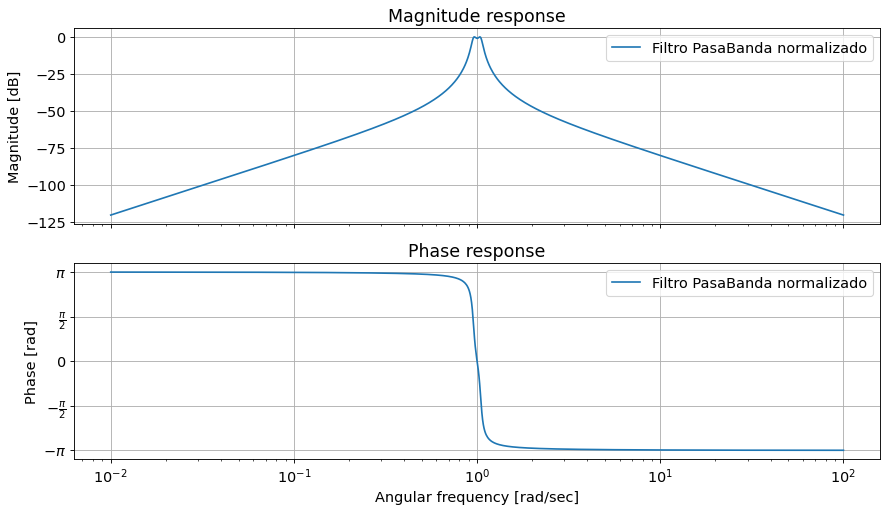

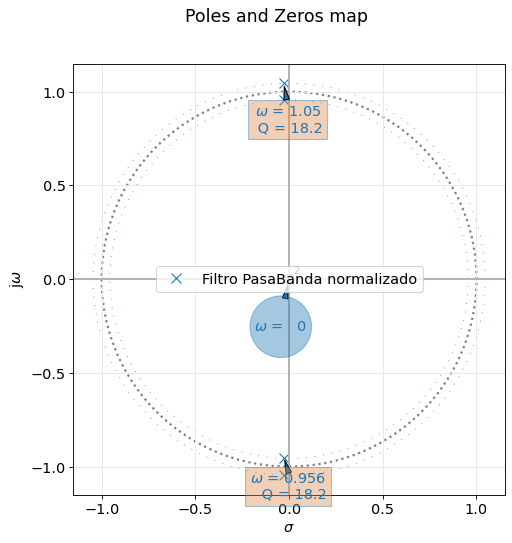

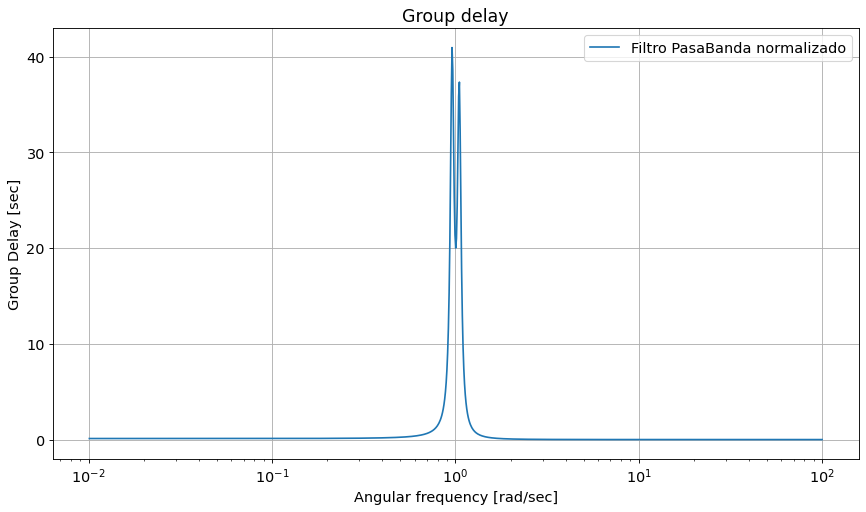

In [28]:
H_bp_n = sig.TransferFunction(num_bp_n, den_bp_n)
analyze_sys(H_bp_n, sys_name="Filtro PasaBanda normalizado")

**c)**

<img src="./Hoja3.jpeg" align="center" /> 

**d)**

<img src="./Hoja4.jpeg" align="center" /> 
<img src="./Hoja5.jpeg" align="center" /> 

No me alcanza para subir las simulaciones circuitales de estos dos items.

<img src="./Consigna3.png" align="center" /> 

**a)**

<img src="./Hoja6.jpeg" align="center" /> 

In [24]:
#Datos de enunciado para filtro pasa banda
a_max = 1
a_min = 30

wp = 10*(10**3)
ws = 10**3

nf = wp

wp_n = wp/wp
ws_n = ws/wp

#Conversión de parámetros para un filtro pasa bajos equivalente
Wp_n = 1/wp_n
Ws_n = 1/ws_n

#Obtención de epsilon y n
e2 = round(10**(a_max/10) - 1, 3)

for aux_n in range(2,5):
    aux_a_min = 10*np.log10(1 + e2*Ws_n**(2*aux_n))
    
    if aux_a_min > a_min:
        n = aux_n
        break
        
print(f"Parámetros del filtro pasa bajos equivalente: \ne² = {e2}, n = {n}")

nf2 = e2**(-1/2/n) #segunda norma de frecuencia (e⁻(1/2n))

z, p, k = sig.buttap(n)
num_lp_n, den_lp_n = sig.zpk2tf(z, p, k)
num_lp_n, den_lp_n = sig.lp2lp(num_lp_n, den_lp_n, nf2) #desnormalización por segunda norma de frecuencia (e⁻(1/n))


sos_lp = tf2sos_analog(num_lp_n, den_lp_n)

print("Transferencia del filtro Prototipo:")
pretty_print_lti(num_lp_n, den_lp_n)

Parámetros del filtro pasa bajos equivalente: 
e² = 0.259, n = 2
Transferencia del filtro Prototipo:


<IPython.core.display.Math object>

**b)**

<img src="./Hoja7.jpeg" align="center" /> 
<img src="./Hoja8.jpeg" align="center" /> 

**c)**

<img src="./Hoja9.jpeg" align="center" /> 